# 検診データによる肝疾患判定

In [1]:
import pandas as pd
import numpy as np
import keras

train = pd.read_csv("./train.csv")
test = pd.read_csv("./test2.csv")
sample = pd.read_csv("./sample_submit.csv",header=None)
print("Data Shapes")
print("Train:",train.shape, "Test:",test.shape, "Sample:",sample.shape)

Using TensorFlow backend.


Data Shapes
Train: (891, 12) Test: (383, 11) Sample: (382, 2)


### データセットの調査

In [2]:
print(train.isnull().sum())
print()
print(test.isnull().sum())

id          0
Age         0
Gender      0
T_Bil       0
D_Bil       0
ALP         0
ALT_GPT     0
AST_GOT     0
TP          0
Alb         0
AG_ratio    4
disease     0
dtype: int64

id          0
Age         0
Gender      0
T_Bil       0
D_Bil       0
ALP         0
ALT_GPT     0
AST_GOT     0
TP          0
Alb         0
AG_ratio    0
dtype: int64


In [3]:
train['AG_ratio'] = train['AG_ratio'].fillna(train['AG_ratio'].mean())
print(train.isnull().sum())

id          0
Age         0
Gender      0
T_Bil       0
D_Bil       0
ALP         0
ALT_GPT     0
AST_GOT     0
TP          0
Alb         0
AG_ratio    0
disease     0
dtype: int64


In [4]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [5]:
train.head()

,id,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease,Gender_Female,Gender_Male
0,0,60,2.9,1.3,170.9,42.1,37.1,5.5,2.9,1.01,1,0,1
1,1,28,0.7,0.1,158.8,26.0,23.9,6.4,3.7,1.36,0,1,0
2,2,60,23.1,12.5,962.0,53.0,40.9,6.8,3.3,0.96,1,0,1
3,3,20,1.0,0.5,415.9,33.9,39.0,7.0,3.8,1.31,0,0,1
4,4,44,0.6,0.3,152.9,40.9,42.0,4.5,2.1,1.04,0,1,0


In [6]:
test.head()

,id,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,Gender_Female,Gender_Male
0,890,61,1.3,0.2,69.0,26.0,28.0,7.0,4.5,1.80,0,1
1,891,65,0.7,0.2,162.0,24.0,20.0,6.4,3.3,0.93,1,0
2,892,46,1.2,0.3,265.1,40.0,28.0,7.9,3.8,0.94,0,1
3,893,26,0.7,0.1,243.1,21.1,22.9,5.3,2.2,0.60,0,1
4,894,38,3.5,1.7,253.0,80.0,406.0,6.8,3.7,1.33,0,1


### 目的変数の抽出

In [7]:
y = train["disease"].values
print(y)
print()
#ONE-HOTに変換
y = keras.utils.to_categorical(y)
print(y)

[1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 0
 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0
 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0
 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1
 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1
 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0
 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0
 1 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0
 0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1
 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1
 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0
 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1
 1 1 1 1 0 1 1 0 1 0 0 1 

### 相関関係を調査

In [8]:
res = train.corr()
print(res['disease'])
print()

id               0.009745
Age              0.144898
T_Bil            0.373955
D_Bil            0.366597
ALP              0.274803
ALT_GPT          0.218902
AST_GOT          0.259385
TP              -0.016355
Alb             -0.187262
AG_ratio        -0.251346
disease          1.000000
Gender_Female   -0.032606
Gender_Male      0.032606
Name: disease, dtype: float64



In [9]:
train = train.drop(columns=["id","Age","Alb","disease","TP","Gender_Female","Gender_Male"])
train.head()

,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,AG_ratio
0,2.9,1.3,170.9,42.1,37.1,1.01
1,0.7,0.1,158.8,26.0,23.9,1.36
2,23.1,12.5,962.0,53.0,40.9,0.96
3,1.0,0.5,415.9,33.9,39.0,1.31
4,0.6,0.3,152.9,40.9,42.0,1.04


In [10]:
test = test.drop(columns=["id","Age","Alb","TP","Gender_Female","Gender_Male"])
train.head()

,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,AG_ratio
0,2.9,1.3,170.9,42.1,37.1,1.01
1,0.7,0.1,158.8,26.0,23.9,1.36
2,23.1,12.5,962.0,53.0,40.9,0.96
3,1.0,0.5,415.9,33.9,39.0,1.31
4,0.6,0.3,152.9,40.9,42.0,1.04


In [11]:
train_data = train.values
train_labels = y
test_data = test.values


### 正規化

In [12]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std


### モデルの構築

In [13]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['mae'])
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                448       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
Total params: 4,738
Trainable params: 4,738
Non-trainable params: 0
_________________________________________________________________


### 学習

In [15]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(train_data, 
                    train_labels,
                    batch_size=1,
                    epochs=100,
                    validation_split=0.2) 


Train on 712 samples, validate on 179 samples
Epoch 1/100
712/712 [==============================] - 2s 3ms/step - loss: 0.5328 - mae: 0.3655 - val_loss: 0.4807 - val_mae: 0.3215
Epoch 2/100
712/712 [==============================] - 1s 2ms/step - loss: 0.5027 - mae: 0.3339 - val_loss: 0.4659 - val_mae: 0.3188
Epoch 3/100
712/712 [==============================] - 1s 2ms/step - loss: 0.4865 - mae: 0.3241 - val_loss: 0.4655 - val_mae: 0.3220
Epoch 4/100
712/712 [==============================] - 1s 2ms/step - loss: 0.4818 - mae: 0.3243 - val_loss: 0.4564 - val_mae: 0.3016
Epoch 5/100
712/712 [==============================] - 1s 2ms/step - loss: 0.4723 - mae: 0.3124 - val_loss: 0.4637 - val_mae: 0.3268
Epoch 6/100
712/712 [==============================] - 2s 2ms/step - loss: 0.4682 - mae: 0.3144 - val_loss: 0.5055 - val_mae: 0.3149
Epoch 7/100
712/712 [==============================] - 1s 2ms/step - loss: 0.4687 - mae: 0.3131 - val_loss: 0.4882 - val_mae: 0.3231
Epoch 8/100
712/712 [==

Epoch 62/100
712/712 [==============================] - 1s 2ms/step - loss: 0.2367 - mae: 0.1528 - val_loss: 0.4244 - val_mae: 0.1969
Epoch 63/100
712/712 [==============================] - 1s 2ms/step - loss: 0.2562 - mae: 0.1561 - val_loss: 0.4822 - val_mae: 0.1897
Epoch 64/100
712/712 [==============================] - 1s 2ms/step - loss: 0.2224 - mae: 0.1442 - val_loss: 0.5653 - val_mae: 0.2003
Epoch 65/100
712/712 [==============================] - 1s 2ms/step - loss: 0.2138 - mae: 0.1461 - val_loss: 0.5670 - val_mae: 0.1917
Epoch 66/100
712/712 [==============================] - 1s 2ms/step - loss: 0.2100 - mae: 0.1360 - val_loss: 0.5571 - val_mae: 0.1843
Epoch 67/100
712/712 [==============================] - 1s 2ms/step - loss: 0.2224 - mae: 0.1437 - val_loss: 0.4535 - val_mae: 0.2065
Epoch 68/100
712/712 [==============================] - 1s 2ms/step - loss: 0.2146 - mae: 0.1392 - val_loss: 0.4486 - val_mae: 0.1808
Epoch 69/100
712/712 [==============================] - 1s 2ms

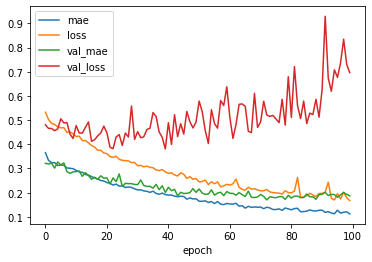

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.epoch, history.history["mae"], label="mae")
plt.plot(history.epoch, history.history["loss"], label="loss")
plt.plot(history.epoch, history.history["val_mae"], label="val_mae")
plt.plot(history.epoch, history.history["val_loss"], label="val_loss")
plt.xlabel("epoch")
plt.legend()

### 予測

In [17]:
test_predictions = model.predict(test_data)
#最大値のインデックス
k = np.argmax(test_predictions,axis=1)
#先頭データが自身のデータ
print(k[0])
if k[0] == 0:
    print('正常です')
else:
    print('肝機能障害です')

1
肝機能障害です
